<a href="https://colab.research.google.com/github/Namratharao22/Customer-Segmentation-Insights/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mall Customer Segmentation using K-Means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [ ]:
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
print("First 5 rows:")
print(data.head())
print("\nMissing values:\n", data.isnull().sum())


First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
print("First 5 rows:")
print(data.head())
print("\nMissing values:\n", data.isnull().sum())


First 5 rows:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

Missing values:
 Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

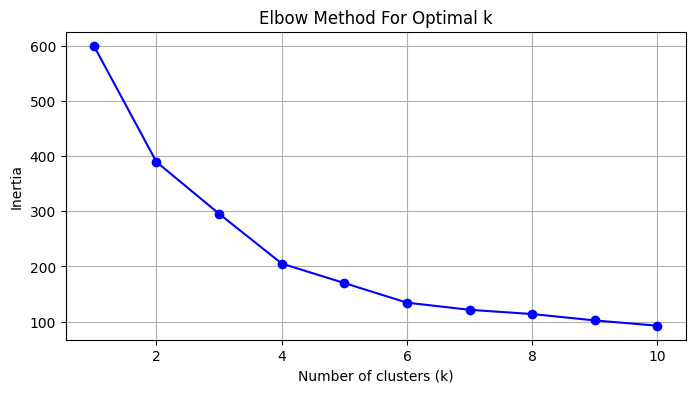

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)


In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

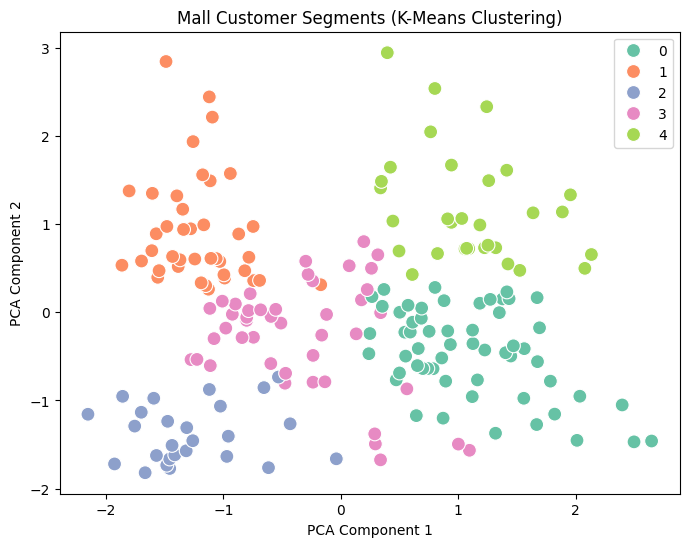

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Mall Customer Segments (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
cluster_summary = data.groupby('Cluster').mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
            Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.568966  55.275862           47.620690               41.706897   
1        0.550000  32.875000           86.100000               81.525000   
2        0.576923  25.769231           26.115385               74.846154   
3        0.600000  26.733333           54.311111               40.911111   
4        0.483871  44.387097           89.774194               18.483871   

             PCA1      PCA2  
Cluster                      
0        1.089268 -0.445323  
1       -1.208516  0.914846  
2       -1.275681 -1.377634  
3       -0.348135 -0.250826  
4        1.096673  1.172275  
